In [57]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib


In [58]:
df = pd.read_csv("../data/cleaned_data123.csv")
#Exam_Score

In [59]:
#splitting train vs test

y=df['Exam_Score']
x=df.drop(['Exam_Score'], axis=1)


#droppinf the cols which end with _label bec they are unnecessary now
x = x[[col for col in x.columns if not col.endswith('_label')]]

In [60]:

x_train,x_test,y_train,y_test= train_test_split (x,y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

In [62]:
x_train_scaled = np.nan_to_num(x_train_scaled)
#
x_test_scaled = np.nan_to_num(x_test_scaled)

In [63]:



models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9763
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         6
           C       0.98      0.97      0.97       278
           D       0.98      1.00      0.99       878
           F       1.00      0.75      0.86        16

    accuracy                           0.98      1183
   macro avg       0.59      0.54      0.56      1183
weighted avg       0.97      0.98      0.97      1183

Decision Tree Accuracy: 0.8470
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         6
           C       0.75      0.75      0.75       278
           D       0.90      0.90      0.90       878
           F       0.24      0.25      0.24        16

    accuracy                           0.85      1183
   macro avg       0.38      0.38      0.38      1183
weighted 

/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.9442
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         6
           C       0.95      0.90      0.92       278
           D       0.94      0.99      0.96       878
           F       0.00      0.00      0.00        16

    accuracy                           0.94      1183
   macro avg       0.38      0.38      0.38      1183
weighted avg       0.92      0.94      0.93      1183



/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.8926
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         6
           C       0.93      0.69      0.79       278
           D       0.88      0.98      0.93       878
           F       0.00      0.00      0.00        16

    accuracy                           0.89      1183
   macro avg       0.36      0.33      0.34      1183
weighted avg       0.88      0.89      0.88      1183

KNN Accuracy: 0.8216
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         6
           C       0.77      0.48      0.59       278
           D       0.83      0.95      0.89       878
           F       0.00      0.00      0.00        16

    accuracy                           0.82      1183
   macro avg       0.32      0.29      0.30      1183
weighted avg       0.80  

/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rola/.local/lib/python

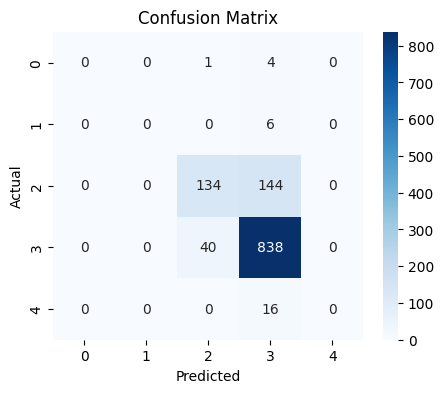

In [64]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

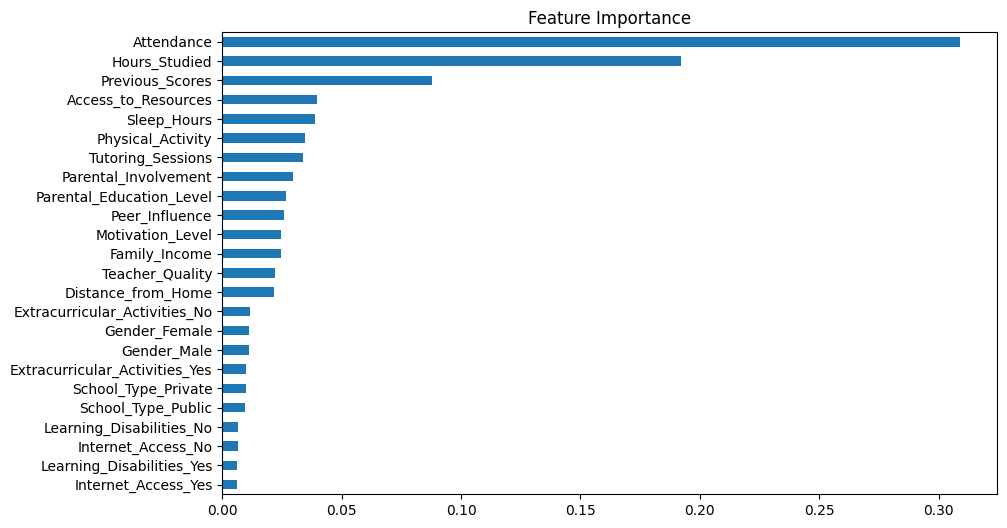

In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
features = pd.Series(importances, index=x_train.columns)
features.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

In [ ]:
# save a model to a file

joblib.dump(model, "../savedmodels/rf_model.pk1")


['rf_model.pk1']

In [ ]:
loaded_model = joblib.load("../savedmodels/rf_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.pkl'